In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn import metrics

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Load data

In [2]:
dataOBj = datasets.load_iris()

In [3]:
## load all features
X = pd.DataFrame(dataOBj.data, columns = dataOBj.feature_names)
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
## load target data
y = pd.DataFrame(dataOBj.target, columns = ['target'])
y.head()

,target
0,0
1,0
2,0
3,0
4,0


In [5]:
## concat to new dataframe
df = pd.concat([X, y], axis = 1)
df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [6]:
## counting target values
df.target.value_counts()

target
0    50
1    50
2    50
Name: count, dtype: int64

In [7]:
## Selecting data
#X = df.iloc[:, [2,3]]
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [8]:
y = df.iloc[:, [4]]
y

,target
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


# Spliting data

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.7, random_state=1, stratify=y)

In [10]:
X_train[:5]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
33,5.5,4.2,1.4,0.2
20,5.4,3.4,1.7,0.2
115,6.4,3.2,5.3,2.3
124,6.7,3.3,5.7,2.1
35,5.0,3.2,1.2,0.2


In [11]:
X_test[:5]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
148,6.2,3.4,5.4,2.3
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
106,4.9,2.5,4.5,1.7
75,6.6,3.0,4.4,1.4


In [12]:
print(f'X_train.shape = {X_train.shape}')
print(f'X_test.shape = {X_test.shape}')
print(f'y_train.shape = {y_train.shape}')
print(f'y_test.shape = {y_test.shape}')

X_train.shape = (105, 4)
X_test.shape = (45, 4)
y_train.shape = (105, 1)
y_test.shape = (45, 1)


# Preprocessing : Standardization

In [13]:
scale = StandardScaler()
scale.fit(X_train)

StandardScaler()

In [14]:
X_train_t = scale.transform(X_train)
X_test_t = scale.transform(X_test)

In [15]:
X_train_t[:5]

array([[-0.4301064 ,  2.63118533, -1.33269725, -1.30728421],
       [-0.55053619,  0.76918392, -1.16537974, -1.30728421],
       [ 0.65376173,  0.30368356,  0.84243039,  1.44587881],
       [ 1.0150511 ,  0.53643374,  1.0655204 ,  1.18367281],
       [-1.03225536,  0.30368356, -1.44424226, -1.30728421]])

# Training model

In [16]:
ppt = Perceptron()
ppt

Perceptron()

In [17]:
ppt.get_params()

{'alpha': 0.0001,
 'class_weight': None,
 'early_stopping': False,
 'eta0': 1.0,
 'fit_intercept': True,
 'l1_ratio': 0.15,
 'max_iter': 1000,
 'n_iter_no_change': 5,
 'n_jobs': None,
 'penalty': None,
 'random_state': 0,
 'shuffle': True,
 'tol': 0.001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [18]:
eta0 = 0.0001
random_state = 88
verobse = 1
n_iter_no_change=100

In [19]:
## adjusting hyperparameter
ppt = Perceptron(eta0=eta0, random_state=random_state, verbose=verobse, n_iter_no_change=n_iter_no_change)
ppt

Perceptron(eta0=0.0001, n_iter_no_change=100, random_state=88, verbose=1)

## muticlassification for perceptron : One - Vs - Rest : 0 vs rest, 1 vs rest, 2 vs rest

In [20]:
## muticlassification for perceptron : One - Vs - Rest : 0 vs rest, 1 vs rest, 2 vs rest
ppt.fit(X_train_t, y_train)

-- Epoch 1
Norm: 0.00, NNZs: 4, Bias: -0.000200, T: 105, Avg. loss: 0.000001
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 4, Bias: -0.000200, T: 210, Avg. loss: 0.000004
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 4, Bias: -0.000200, T: 315, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.00, NNZs: 4, Bias: -0.000200, T: 420, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 0.00, NNZs: 4, Bias: -0.000200, T: 525, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 0.00, NNZs: 4, Bias: -0.000200, T: 630, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 0.00, NNZs: 4, Bias: -0.000200, T: 735, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 0.00, NNZs: 4, Bias: -0.000200, T: 840, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 0.00, NNZs: 4, Bias: -0.000200, T: 945, Avg. loss: 0.000000
Total training time: 0.00 s

/Users/jessadakorn/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished


Perceptron(eta0=0.0001, n_iter_no_change=100, random_state=88, verbose=1)

In [21]:
## predicting
predicted = ppt.predict(X_test_t)
predicted

array([2, 0, 0, 2, 1, 1, 2, 2, 2, 0, 0, 2, 0, 1, 0, 1, 2, 1, 1, 2, 2, 0,
       1, 2, 1, 1, 1, 2, 0, 2, 0, 0, 1, 1, 2, 2, 0, 0, 0, 1, 2, 2, 1, 0,
       0])

In [22]:
acc_train = ppt.score(X_train_t, y_train)
acc_train

0.9619047619047619

In [23]:
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.93      0.97        15
           2       0.94      1.00      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



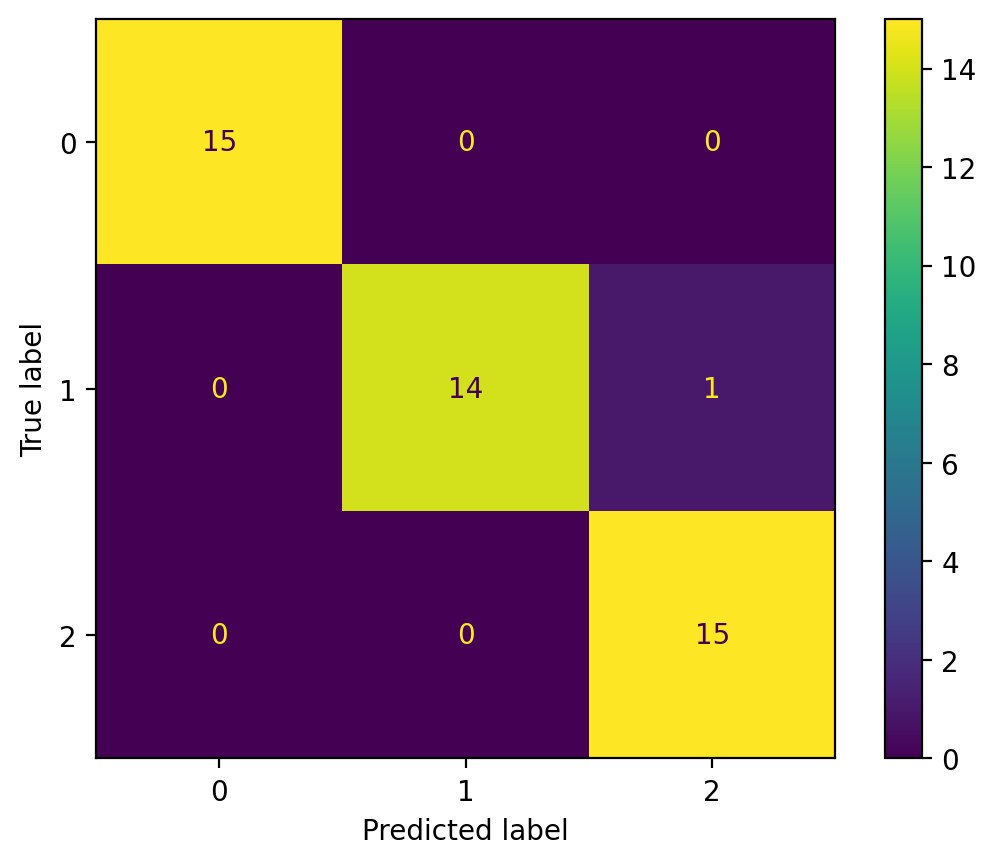

In [24]:
cm = metrics.confusion_matrix(y_test, predicted)
fig = metrics.ConfusionMatrixDisplay(cm)
fig.plot()

In [25]:
result = pd.concat([pd.DataFrame(X_test_t), y_test.reset_index(drop = True), 
                    pd.DataFrame(predicted, columns = ['predicted'])], axis = 1)
result.head()

,0,1,2,3,target,predicted
0,0.412902,0.769184,0.898203,1.445879,2,2
1,-0.550536,1.932935,-1.165380,-1.045078,0,0
2,-1.513975,0.769184,-1.332697,-1.176181,0,0
3,-1.152685,-1.325568,0.396250,0.659261,2,2
4,0.894621,-0.161817,0.340478,0.265952,1,1


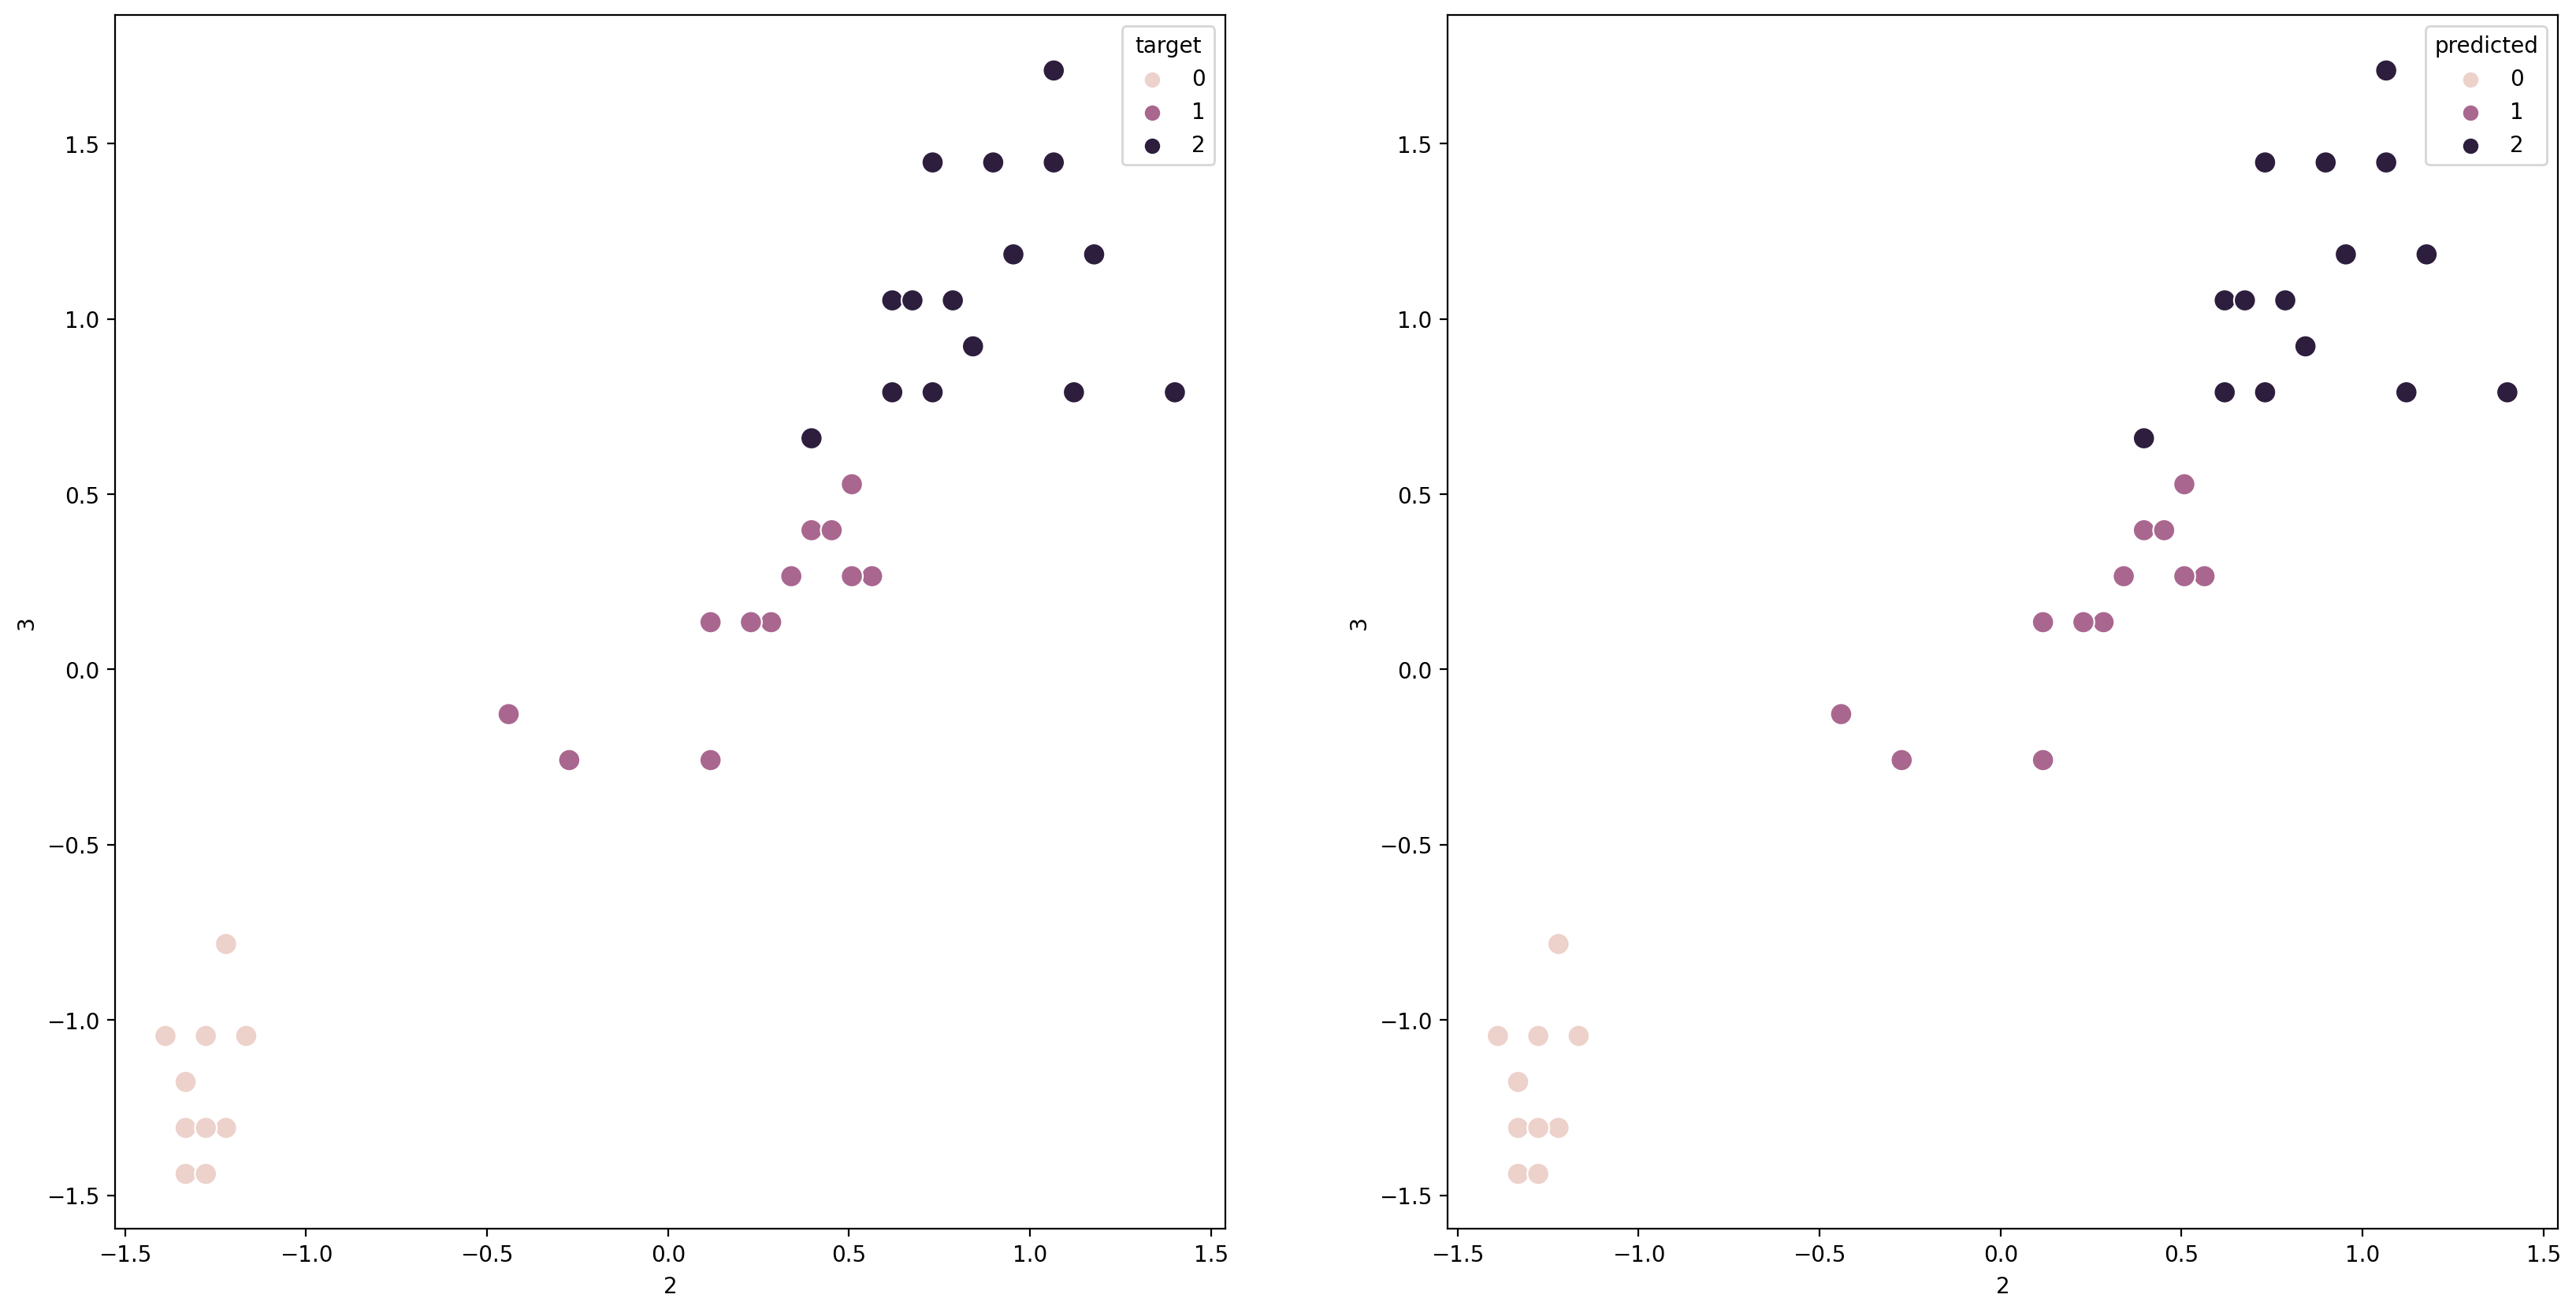

In [26]:
fig, ax = plt.subplots(1, 2, figsize = (20, 10))
sns.scatterplot(data=result, x=2, y=3, hue='target', ax = ax[0], s = 100)
sns.scatterplot(data=result, x=2, y=3, hue='predicted', ax = ax[1], s = 100);

In [27]:
result[result.target != result.predicted]

,0,1,2,3,target,predicted
7,0.412902,-2.023818,0.39625,0.397055,1,2
